# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
!pip install missingno

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as ny 
import missingno as mi
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [3]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Посмотрели общую информацию о данных: количество столбцов, наличие пропусков, типы данных в столбцах. Посмотрели визуально на данные.
Открыли библиотеку matplotlib.pyplot для построения графиков.

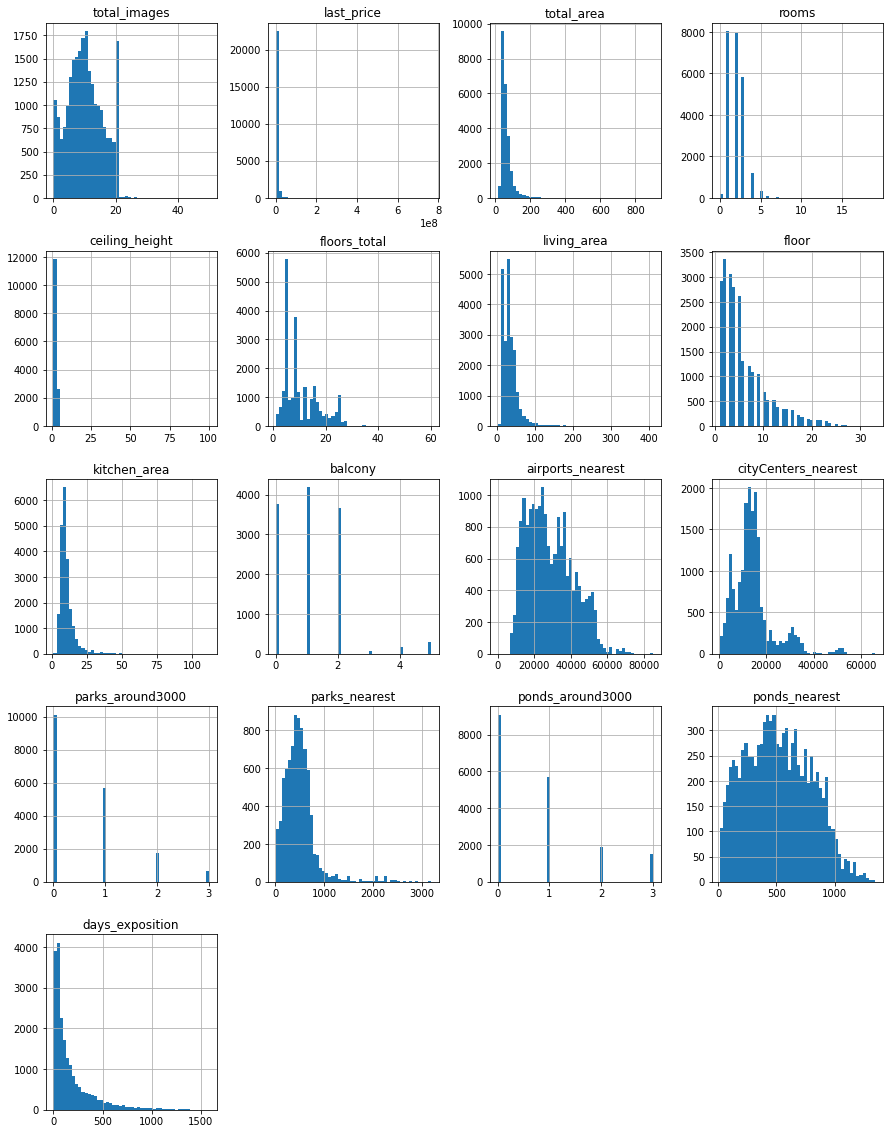

In [6]:
data.hist(bins=50, figsize=(15, 20))
plt.show()

Вывод:

 1 total_images - число фотографий квартиры в объявлении. Пустых ячеек нет, целые значения, 3 пика: 0, около 10 и 20, тип данных (int64) менять не нужно.
 
 2 last_price - цена на момент снятия с публикации. Пустых ячеек нет, основное количество цен представлены, предположительно, в рублях (максимальная цена 763 000 000, в среднем около 6 540 000), но есть большое количество данных, предположительно, в тысячах рублей (минимально 12 190), они могут повлиять на анализ, эти данные нужно обработать, тип данных (float64) менять не нужно.
 
 3 total_area - общая площадь квартиры в квадратных метрах. Пустых ячеек нет, тип данных (float64) менять не нужно.
 
 4 rooms - число комнат. Пустых ячеек нет,но есть нулевые( возможно студии), тип данных (int64) менять не нужно.
 
 5 ceiling_height - Высота потолков. Большое количество пропущенных значений( скорее всего пользователи не указывают эту информацию при размещении объявления), есть очень большие значения (максимальное 100 метров), возможно, ошибка во время внесения данных пользователем, тип данных (float64) менять не нужно.
 
 6 floors_total - Всего этажей в доме. Есть пропущенные значения, тип данных (float64) нужно сменить на int64.
 
 7 living_area - Жилая площадь в квадратных метрах. Есть пропущенные значения, имеются очень маленькие значения( вероятно, ошибка внесения данных), тип данных (float64) менять не нужно.
 
 8  floor - Этаж. Пустых ячеек нет, тип данных (int64) менять не нужно.
 
 9 kitchen_area - Площадь кухни в квадратных метрах. Есть пропущенные значения, есть очень маленькие значения(вероятно ошибка при внесении данных пользователем) , тип данных (float64) менять не нужно.
 
 10 balcony - число балконов. Большое количество пропущенных значений, ( нужно проанализировать, возможно балконов нет) тип данных (float64) нужно сменить на int64.
 
 11 airports_nearest - расстояние до ближайшего аэропорта в метрах. Есть пропущенные значения, тип float64 менять не нужно.
 
 12 cityCenters_nearest - расстояние до центра города. Есть пропущенные значения, тип float64 менять не нужно.
 
 13 parks_around3000 - число парков в радиусе 3 км. Есть пропущенные значения, тип данных (float64) нужно сменить на int64.
 
 14 parks_nearest - расстояние до ближайшего парка. Большое количество пропущенных значений, тип float64 менять не нужно.
 
 15 ponds_around3000 - число водоемов в радиусе 3 км. Есть пропущенные значения, тип данных (float64) нужно сменить на int64.
 
 16 ponds_nearest - расстояние до ближайшего водоема. Большое количество пропущенных значений, значения в [13, 1344], тип float64 менять не нужно.
 
 17 days_exposition - Сколько дней было размещено объявление. Есть пропущенные значения, тип данных (float64) нужно сменить на int64.
 
 18 first_day_exposition - дата публикации. Пустых ячеек нет, тип данных (object) нужно сменить на datetime.
 
 19 is_apartment - апартаменты. В большей части объявлений пустые значения, тип данных (object) нужно сменить на bool.
 
 20 locality_name - названия населенного пункта. Есть пропущенные значения, уникальных значений 364, нужно убедиться в их уникальности( есть ли логические повторы), тип object менять не нужно.
 
 21 open_plan - свободная планировка. Пустых ячеек нет, тип данных (bool) менять не нужно.
 
 22 studio -  квартира- студия. Пустых ячеек нет, тип данных (bool) менять не нужно.


### Предобработка данных

Преобразуем столбец last_price, так как в нем есть подозрительно низкие значения.

In [7]:
data['last_price'].sort_values()

8793         12190.0
17456       430000.0
14911       430000.0
16274       440000.0
17676       450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23699, dtype: float64

In [8]:
data.loc[8793, 'last_price'] = data.loc[8793, 'last_price'] * 1000

In [9]:
data['last_price'].describe()

count    2.369900e+04
mean     6.542063e+06
std      1.088699e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Скорее всего была допущена ошибка пользователем, при заполнении данных о цене. Преобразовали в единый формат числа. Вывели общую информацию о столбце.

Преобразуем столбец first_day_exposition на тип datetime.

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%')

In [11]:
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Посмотрим столбец rooms, предположим, сколько квартир студий.

In [12]:
sum(data['rooms'] == 0)

197

Посмотрим столбец ceiling_height и его уникальные значения. Можно увидеть, что есть не правдоподобные значения ( начинаются с 6 м), пропущенные, значения а так же равные 100, 1.2, 1 удалим. Значения в [20, 32] преобразуем, это скорее всего, ошибка единицы измерения, допущенная при внесении данных. Пустые значения, которые скорее всего появились, в результате ошибки пользователя при заполнении, заменим медианным значением по столбцу.

<AxesSubplot:>

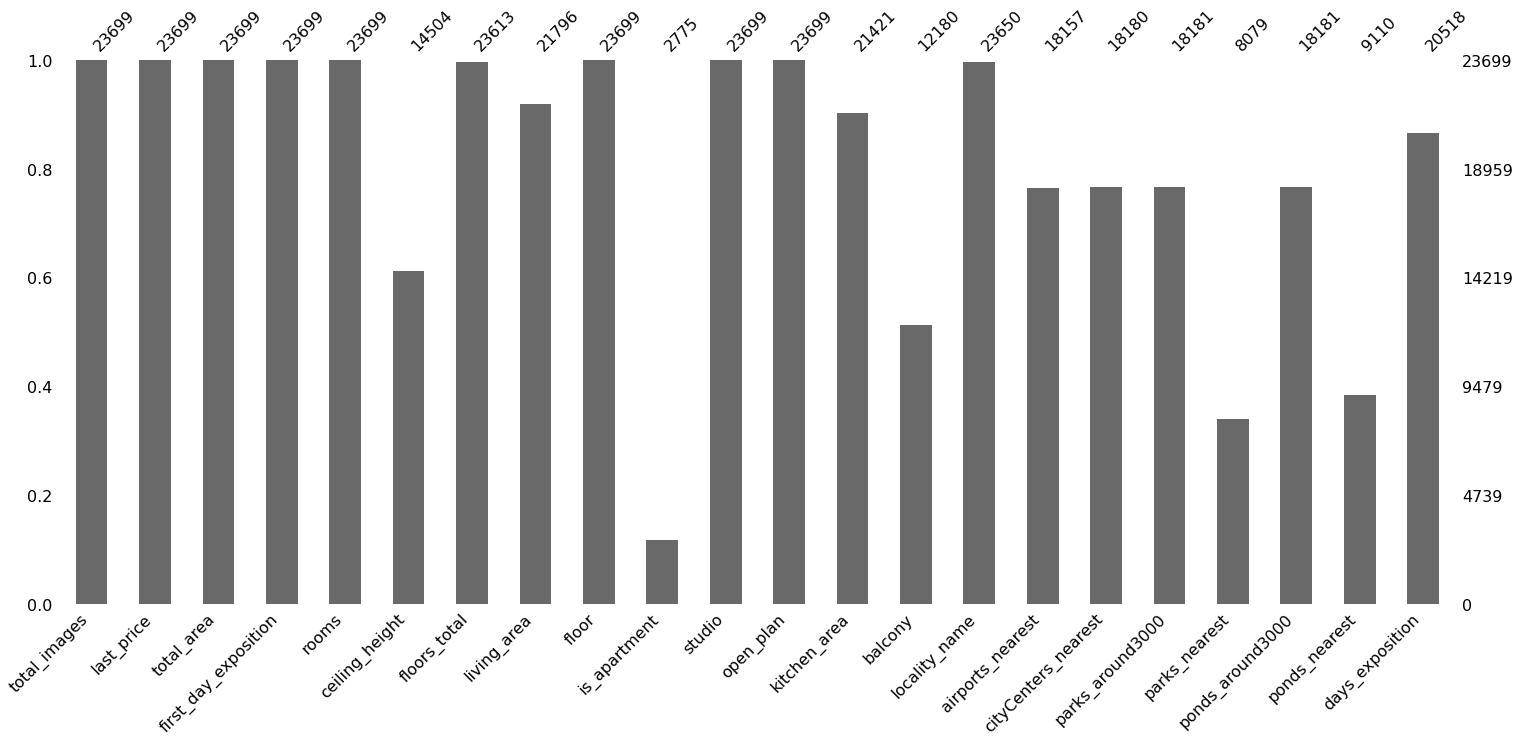

In [13]:
mi.bar(data)

In [14]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [15]:
data[data['ceiling_height'] > 6]['ceiling_height'].sort_values()

3474       8.0
17442      8.0
15743      8.0
5863       8.3
22309     10.3
15061     14.0
17496     20.0
20507     22.6
5076      24.0
355       25.0
18545     25.0
11285     25.0
14382     25.0
9379      25.0
6246      25.0
4643      25.0
5669      26.0
5807      27.0
5246      27.0
17857     27.0
4876      27.0
20478     27.0
21824     27.0
10773     27.0
22938     27.0
21377     27.5
3148      32.0
22336     32.0
22869    100.0
Name: ceiling_height, dtype: float64

In [16]:
data[data['ceiling_height'] < 1.5]['ceiling_height'].sort_values()

22590    1.0
5712     1.2
Name: ceiling_height, dtype: float64

In [17]:
data.drop(data[(data['ceiling_height'] < 1.5) |
               ((data['ceiling_height'] > 6) & (data['ceiling_height'] < 20)) |
               (data['ceiling_height'] == 100)].index, inplace=True) #отфильтруем лишнии строки с неподходящей высотой
data.shape #проверим, сработала ли фильтрация

(23690, 22)

In [18]:
ceiling_height_new = data[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 32)].index
ceiling_height_new

Int64Index([  355,  3148,  4643,  4876,  5076,  5246,  5669,  5807,  6246,
             9379, 10773, 11285, 14382, 17496, 17857, 18545, 20478, 20507,
            21377, 21824, 22336, 22938],
           dtype='int64')

In [19]:
data.loc[ceiling_height_new, 'ceiling_height'] = data.loc[ceiling_height_new, 'ceiling_height'] / 10 #преобразуем значения к единому виду

In [20]:
data.ceiling_height.describe()

count    14495.000000
mean         2.726556
std          0.278811
min          1.750000
25%          2.510000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

In [21]:
ceiling_height_median = data['ceiling_height'].median() #заполним пропуски медианым значением, она менее подвержина выбросам
ceiling_height_median

2.65

In [22]:
data['ceiling_height'].fillna(ceiling_height_median, inplace=True) #добавим медианые значения в таблицу
data['ceiling_height'].isna().sum() #проверим, действительно ли избавились от пропусков

0

Столбец floors_total нужна преобразовать на тип int64. Заполнить пропуски медианными значениями floors_total для групп полученных по floor. Данные могут отсутствуют по причине необязательности заполнения этих столбцов пользователем.

In [23]:
data['floors_total'].isna().sum() #посмотрим сколько пропусков в столбце

86

In [24]:
data['floors_total'].fillna(data.groupby('floor')['floors_total'].transform('median'), inplace=True) #преобразуем таблицу, сгруппировав по колличеству комнат, и заполним пропуски мединным значением
data['floors_total'].isna().sum() #убедимся, что пропусков не осталось

0

In [25]:
data['floors_total'] = data['floors_total'].astype('int64') #преобразуем данные в целочисленный формат
data['floors_total'].head()

0    16
1    11
2     5
3    14
4    14
Name: floors_total, dtype: int64

living_area и kitchen_area - Скорее всего эти поля необязательны для заполнения, заполним пропуски средним значением.

In [26]:
data['living_area'].isna().sum() #посмотрим количество пропусков

1903

In [27]:
data['living_area'].fillna(data['total_area'] - data['kitchen_area'], inplace=True) #заполним пропущенные значения столбца 'living_area' разностью между значениями столбца 'total_area' и 'kitchen_area', а затем подсчитывает количество оставшихся пропущенных значений.
data['living_area'].isna().sum()

1464

In [28]:
data['living_area'].fillna(data['total_area'] / (data['rooms'] + 1) * data['rooms'], inplace=True) #если отсудвуют оба значения, то заполним его +1 от общего числа комнат
data['living_area'].isna().sum()

0

In [29]:
data['kitchen_area'].isna().sum() #посмотрим пропуски в столбце площади кухни

2276

In [30]:
data['kitchen_area'].fillna(data['total_area'] - data['living_area'], inplace=True) #заполним пропуски, отношением общей площади квартиры к жилой площади
data['kitchen_area'].isna().sum() #проверим все ли пропущеные значения устранили

0

is_apartment - Много пропущенных значений, скорее всего связаны с незнанием пользователей, о категории апартаменты, те кто понимал, заполнил эту графу, но скорее всего она была на обязательна. Изменим тип данных object на bool.

In [31]:
data['is_apartment'].value_counts() #посмотрим количество пропусков в формате False и True

False    2724
True       49
Name: is_apartment, dtype: int64

In [32]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [33]:
data['is_apartment']

0        True
1        True
2        True
3        True
4        True
         ... 
23694    True
23695    True
23696    True
23697    True
23698    True
Name: is_apartment, Length: 23690, dtype: bool

balcony - пропущенные значений возникли, потому что пользователи не имеющие балкон не заполнили значение, заполним пропуски на 0, тип данных (float64) сменим на int64.

In [34]:
data['balcony'].isna().sum() #посмотрим число пропусков

11514

In [35]:
data['balcony'].fillna(0, inplace=True) #заменим пропуски на 0, убедимся, что пропусков нет
data['balcony'].isna().sum()

0

In [36]:
data['balcony'] = data['balcony'].astype('int64') #изменим тип данных на челочисленый.
data['balcony']

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23690, dtype: int64

locality_name уменьшаем количество уникальных населенных пунктов отбросив тип населенных пунктов. Можно найти строки с airports_nearest и cityCenters_nearest такими же как для пропущеного, но с заполненым названием населенного пункта и заполнить часть пустых значений

In [37]:
data['locality_name'].nunique() #посмотрим сколько уникальных наименований 

364

In [38]:
data['locality_name'] = data['locality_name'].str.lower() #преобразуем все к единому регистру
data['locality_name'].nunique()

364

In [39]:
sorted(data[~data['locality_name'].isna()]['locality_name'].unique())

['бокситогорск',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'высоцк',
 'гатчина',
 'городской поселок большая ижора',
 'городской поселок янино-1',
 'городской посёлок будогощь',
 'городской посёлок виллози',
 'городской посёлок лесогорский',
 'городской посёлок мга',
 'городской посёлок назия',
 'городской посёлок новоселье',
 'городской посёлок павлово',
 'городской посёлок рощино',
 'городской посёлок свирьстрой',
 'городской посёлок советский',
 'городской посёлок фёдоровское',
 'городской посёлок янино-1',
 'деревня агалатово',
 'деревня аро',
 'деревня батово',
 'деревня бегуницы',
 'деревня белогорка',
 'деревня большая вруда',
 'деревня большая пустомержа',
 'деревня большие колпаны',
 'деревня большое рейзино',
 'деревня большой сабск',
 'деревня бор',
 'деревня борисова грива',
 'деревня ваганово',
 'деревня вартемяги',
 'деревня вахнова кара',
 'деревня выскатка',
 'деревня гарболово',
 'деревня глинка',
 'деревня горбунки',
 'деревня гостилицы',
 'деревня заклинье',

In [40]:
def locality_type_new(locality_name): #создадим функцию, которая отфильтрует повторяющиеся названия по типу населеного пункта, удалит их
    locality_types = ['городской поселок ', 
                      'городской посёлок ',
                      'деревня ',
                      'коттеджный поселок ', 
                      'поселок ',
                      'поселок городского типа ',
                      'поселок станции ',
                      'посёлок ',
                      'посёлок городского типа ',
                      'посёлок при железнодорожной станции ',
                      'посёлок станции ',
                      'садоводческое некоммерческое товарищество ',
                      'садовое товарищество ',
                      'село ', 
                      'станции ', 
                      'городского типа ', 
                      'при железнодорожной станции ',
                      'коттеджный ',
                      'при железнодорожной ']
    try:
        for locality_type in locality_types:
            locality_name = locality_name.replace(locality_type, '')
        return locality_name
    except:
        return locality_name

In [41]:
data['locality_name'] = data['locality_name'].apply(locality_type_new)
data['locality_name'].nunique() #вставим рузультаты фильтрации, и посмотрим на сколько уменьшилось уникальных значений.

305

In [42]:
sorted(data[~data['locality_name'].isna()]['locality_name'].unique()) #отсортируем уникальные значения locality_name, исключая пропуски.

['агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'будогощь',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'вещево',
 'виллози',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'гостилицы',
 'громово',
 'дзержинского',
 'дружная горка',
 'дружноселье',
 'дубровка',
 'елизаветино',
 'ефимовский',
 'жилгородок',
 'жилпосёлок',
 'житково',
 'заводской',
 'заклинье',
 'заневка',
 'запорожское',
 'зеленогорск',
 'зимитицы',
 'ивангород',
 'извара',
 'ильичёво',
 'имени морозова',
 'и

In [43]:
data[~data['airports_nearest'].isna()]['locality_name'].unique() #Выведем уникальные значения столбца locality_name из строк, где значение столбца airports_nearest не имеет пропуска.Так мы узнаем список населенных пунктов, для которых указано расстояние до аэропорта.

array(['санкт-петербург', 'шушары', 'парголово', 'ломоносов', 'петергоф',
       'пушкин', 'колпино', 'кронштадт', 'металлострой', 'павловск',
       'сестрорецк', 'красное село', 'понтонный', 'зеленогорск',
       'молодёжное', 'стрельна', 'александровская', nan, 'песочный',
       'петро-славянка', 'репино', 'сапёрный', 'щеглово', 'лисий нос',
       'левашово', 'белоостров', 'мурино', 'усть-ижора'], dtype=object)

In [44]:
data[~data['cityCenters_nearest'].isna()]['locality_name'].unique() #Проверим то же самое для столбца cityCenters_nearest

array(['санкт-петербург', 'шушары', 'парголово', 'ломоносов', 'петергоф',
       'пушкин', 'колпино', 'кронштадт', 'металлострой', 'павловск',
       'сестрорецк', 'красное село', 'понтонный', 'зеленогорск',
       'молодёжное', 'стрельна', 'александровская', nan, 'песочный',
       'петро-славянка', 'репино', 'сапёрный', 'щеглово', 'лисий нос',
       'левашово', 'белоостров', 'мурино', 'усть-ижора'], dtype=object)

In [45]:
data.groupby(['airports_nearest', 'cityCenters_nearest'])['locality_name'].transform('first') #Выведим каждое значение соответствует первому значению столбца locality_name в соответствующей группы, сгруппированной по airports_neares и cityCenters_nearest.

0        санкт-петербург
1                 шушары
2        санкт-петербург
3        санкт-петербург
4        санкт-петербург
              ...       
23694    санкт-петербург
23695                NaN
23696                NaN
23697    санкт-петербург
23698                NaN
Name: locality_name, Length: 23690, dtype: object

In [46]:
data['locality_name'].isna().sum() 

49

In [47]:
data['locality_name'].fillna(data.groupby(['airports_nearest', 'cityCenters_nearest'])['locality_name'].transform('first'), inplace=True) #заполним пропуски первыми значениями из столбцов
data['locality_name'].isna().sum() #видим, что колличество еще сократилось

31

In [48]:
data.dropna(subset=['locality_name'], inplace=True) #удалим оставшиеся пропуски
data['locality_name'].isna().sum()

0

airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, какие возможно, пропущенные значения заполню медианными по населенному пункту. Эти столбцы были загружены автоматически, пропуски связаны с тем, что загрузка скорее всего была для самых крупных. Возможно также, была потеря информации, невозможность определения геолокации и тп. Для airports_nearest - найти таблицу расстоянии от аэропорта до каждого населенного пункта Ленинградской области и заполнить оставшиеся пропуски с помощью такой таблицы. С остальными показателями задача сложнее. Оставшиеся пропуски не будим изменять.

In [49]:
distance = ['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']

In [50]:
data[distance].isna().sum()

airports_nearest        5532
cityCenters_nearest     5509
parks_around3000        5508
parks_nearest          15596
ponds_around3000        5508
ponds_nearest          14563
dtype: int64

In [51]:
for column in distance:
    data[column].fillna(data.groupby('locality_name')[column].transform('median'), inplace=True) #Создадим функцию, которая заполнение пропущенных значений в каждом столбце из списка auto_columns в соответствии с медианой для каждого уникального значения в столбце 

In [52]:
data[distance].isna().sum()

airports_nearest       4827
cityCenters_nearest    4827
parks_around3000       4827
parks_nearest          5996
ponds_around3000       4827
ponds_nearest          4936
dtype: int64

In [53]:
for column in distance:
    print(f'тип: {column}, количество населенных пунктов: {data[~data[column].isna()]["locality_name"].nunique()}')

тип: airports_nearest, количество населенных пунктов: 27
тип: cityCenters_nearest, количество населенных пунктов: 27
тип: parks_around3000, количество населенных пунктов: 27
тип: parks_nearest, количество населенных пунктов: 12
тип: ponds_around3000, количество населенных пунктов: 27
тип: ponds_nearest, количество населенных пунктов: 19


days_exposition - пустые значения означают, что объявление, еще не снято с публикации.

In [54]:
data['days_exposition'].isna().sum() #посмотрим сколько пропусков

3180

In [55]:
data.duplicated().sum()

0

### Посчитайте и добавьте в таблицу новые столбцы

Вычислим и добавим в таблицу цену одного квадратного метра.

In [56]:
data['price_m2'] = data['last_price']/data['total_area']
data['price_m2'].describe().round(3)

count      23659.000
mean       99417.367
std        50221.387
min         7962.963
25%        76635.344
50%        95000.000
75%       114259.259
max      1907500.000
Name: price_m2, dtype: float64

Можно увидеть, что цена одного квадратного метра, минимально 7962.963, максимальная 1907500,0. 

Добавим в таблицу год, месяц публикации объявления.

In [57]:
data['year'] = data['first_day_exposition'].apply(lambda x: x.year)

In [58]:
data['year'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year, dtype: int64

In [59]:
data['month'] = data['first_day_exposition'].apply(lambda x: x.month)
data['month'].head()

0     3
1    12
2     8
3     7
4     6
Name: month, dtype: int64

Добавим день недели публикации объявления, где 1 - понедельник, 7 - воскресенье.

In [60]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['weekday_exposition'].head()

0    3
1    1
2    3
3    4
4    1
Name: weekday_exposition, dtype: int64

Добавим тип этажа квартиры (значения — «первый», «последний», «другой»)

In [61]:
def floor_type(floor, floors_total): #создадим функцую, которая определяет тип этажа в здании на основе значения текущего этажа и общего количества этажей.
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'
data['floor_type'] = data.apply(lambda x: floor_type(x['floor'], x['floors_total']), axis=1) #добавим новый столбец со значением
data[['floor', 'floors_total', 'floor_type']].head(20)

,floor,floors_total,floor_type
0,8,16,другой
1,1,11,первый
2,4,5,другой
3,9,14,другой
4,13,14,другой
5,5,12,другой
6,6,26,другой
7,22,24,другой
8,26,27,другой
9,7,9,другой


Найдем расстояние до центра города в километрах (переведем из м в км и округлите до целых значений)

In [62]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()
data['cityCenters_nearest_km']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: cityCenters_nearest_km, Length: 23659, dtype: float64

### Проведите исследовательский анализ данных

Изучим данные площади общей, жилой и площадь кухни. Построим по ним гистрограмму для наглядности данных. 

In [63]:
data[['total_area', 'living_area', 'kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,23659.000000,23659.000000,23659.000000
mean,60.332744,35.293528,11.414991
std,35.658607,24.073388,7.628379
min,12.000000,0.000000,0.000000
25%,40.000000,19.000000,7.200000
50%,52.000000,30.200000,9.800000
75%,69.725000,43.000000,13.000000
max,900.000000,571.000000,371.000000


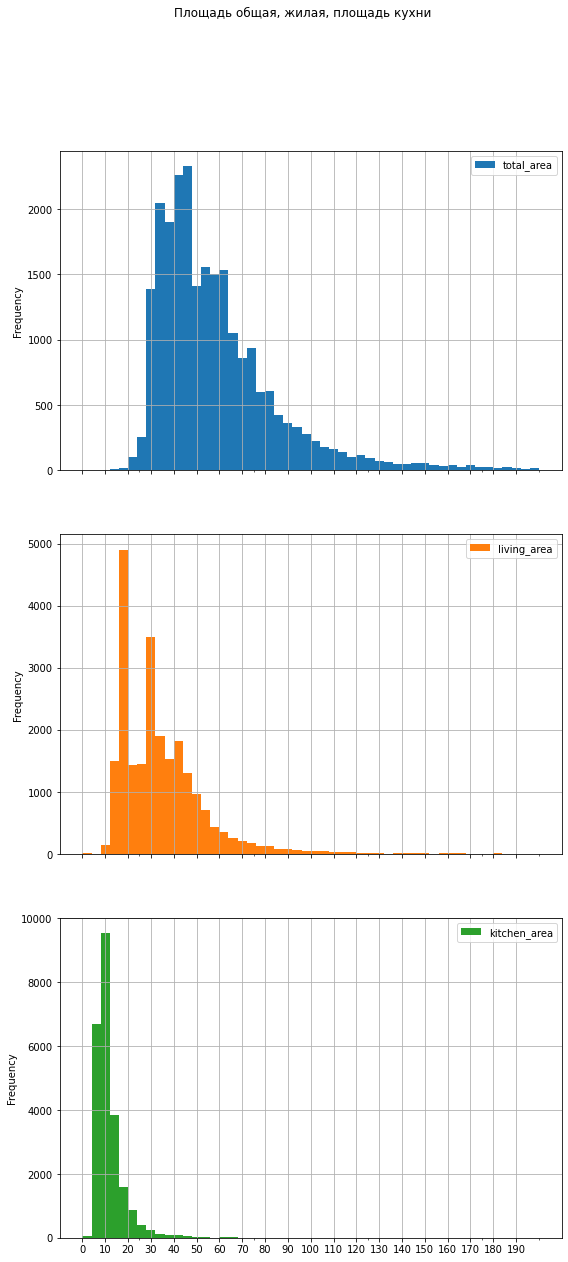

In [64]:
data[['total_area', 'living_area', 'kitchen_area']].plot(kind='hist', 
                                         subplots=True,
                                         title='Площадь общая, жилая, площадь кухни',                
                                         xticks=range(0, 200, 10), 
                                         bins=50, range=(0, 200),
                                         grid=True,figsize=(9, 20));

Построим гистраграмму и изучим данные цены объекта. 

In [65]:
data['last_price'].describe().round()

count        23659.0
mean       6541402.0
std       10894520.0
min         430000.0
25%        3400000.0
50%        4650000.0
75%        6799000.0
max      763000000.0
Name: last_price, dtype: float64

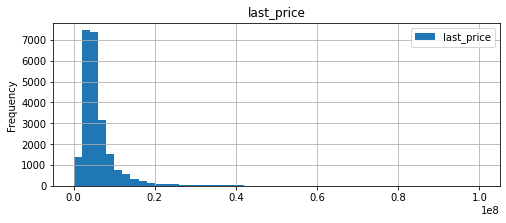

In [114]:
data['last_price'].plot(kind='hist', 
                        figsize=(8, 3), 
                        bins=50,
                        legend=True,
                        grid=True,
                        range=(0, 100000000),
                        title='last_price');

Построим гистограмму количества комнат.

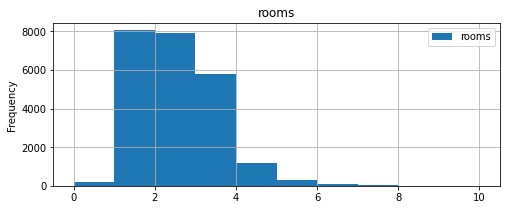

In [115]:
data['rooms'].plot(kind='hist',
                   figsize=(8, 3),
                   bins=10,
                   legend=True,
                   grid=True,
                   range=(0, 10),
                   title='rooms');

Построим гистограму высоты потолков.

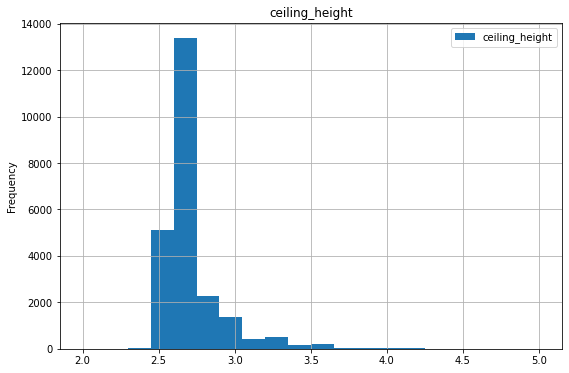

In [116]:
data['ceiling_height'].plot(kind='hist',
                            figsize=(9, 6),
                            range=(2,5),
                            bins=20,
                            grid=True,
                            legend=True,
                            title='ceiling_height'
                           );

Построим гистограмму общее колличество этажей в доме.

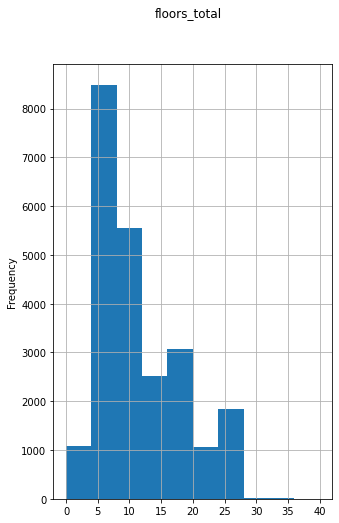

In [118]:
data[ 'floors_total'].plot(kind='hist',
                                     subplots=True,
                                     grid=True,
                                     range=(0, 40),
                                     bins=10,
                                     figsize=(5, 8),
                                     title='floors_total');

Гистограмма тип этажа квартиры («первый», «последний», «другой»)

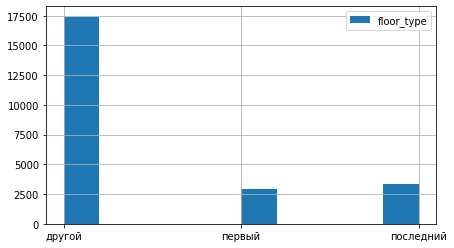

In [120]:
data['floor_type'].hist(legend=True, figsize=(7, 4));

Построим графики расстояния до центра города в метрах и расстояние до ближайшего аэропорта.

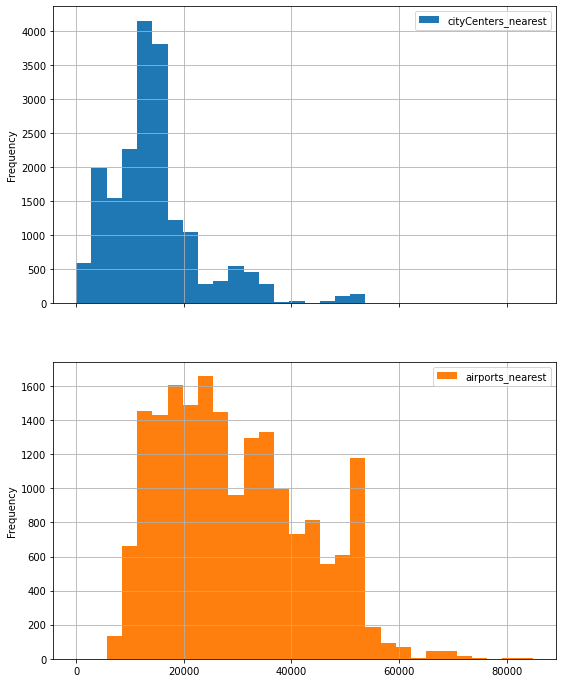

In [71]:
data[['cityCenters_nearest', 'airports_nearest']].plot(kind='hist',
                                                       subplots=True,
                                                       grid=True,
                                                       bins=30,
                                                       figsize=(9, 12));

Гистограмма расстояние до ближайшего парка.

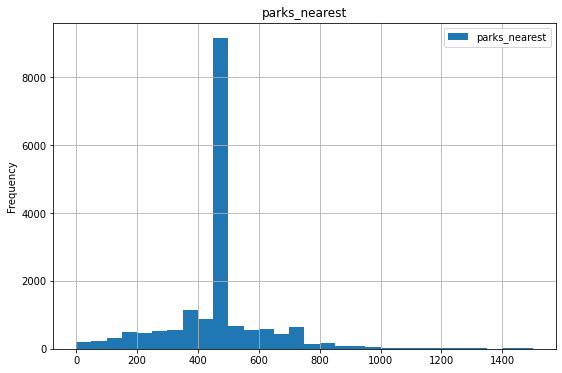

In [121]:
data['parks_nearest'].plot(kind='hist',
                           grid=True,
                           bins=30,
                           range=(0, 1500),
                           legend=True,
                           figsize=(9, 6),
                           title='parks_nearest');

Посмотрим график месяца публикации.

<AxesSubplot:title={'center':'month'}, ylabel='Frequency'>

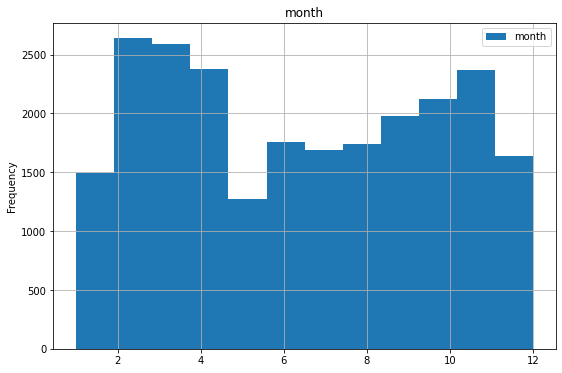

In [122]:
data['month'].plot(kind='hist',
                              legend=True,
                              bins=12,
                              grid=True,
                              figsize=(9, 6),
                              title='month')

И график публикаций по дням.

<AxesSubplot:title={'center':'weekday_exposition'}, ylabel='Frequency'>

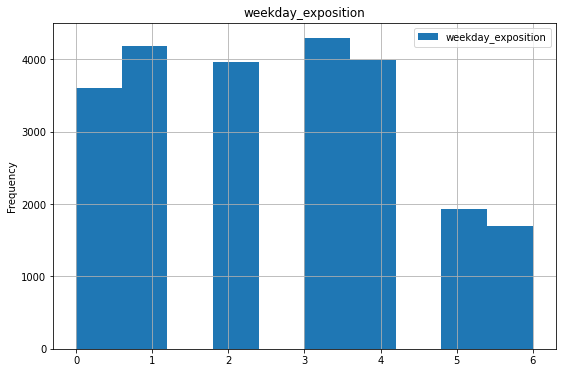

In [123]:
data['weekday_exposition'].plot(kind='hist',
                                legend=True,
                                grid=True,
                                figsize=(9, 6),
                                title='weekday_exposition')

Вывод:

 Большая часть квартир имеет размер от 30 до 80 кв.м., пик приходится на 50 кв.м. Максимальная площадь 900 кв.м, но квартир с такой площадью очень мало, минимальная площадь 12кв.м, это скорее всего квартиры студии. В среднем цена на недвижимость варьируется от 3.4 мл до 6,7мл.Первого и последнего этажей в выборке примерно одинаково, остальных значительно больше. Расстояние до ближайшего парка имеет пик в 500 м, возможно, потому что эти данные собирались не по всем населённым пунктам. В будни объявления размещают равномерно, в выходные более неохотно. По месяцам просадки в подаче объявлений наблюдаются в декабре, январе, мае,так же имеется сезонность, летом количество объявлений меньше. Большинство признаков имеют распределения похожие на распределение Пуассона( смещено влево).


Проанализируем скорость продажи квартир.

In [75]:
data['days_exposition'].describe().round()

count    20479.0
mean       181.0
std        220.0
min          1.0
25%         45.0
50%         95.0
75%        231.0
max       1580.0
Name: days_exposition, dtype: float64

In [76]:
data['days_exposition'].median()

95.0

<AxesSubplot:title={'center':'days_exposition'}, ylabel='Frequency'>

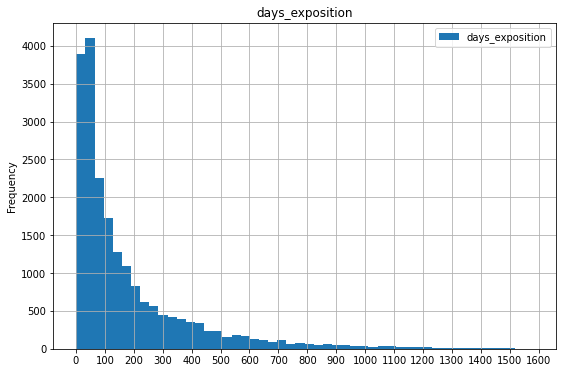

In [124]:
data['days_exposition'].plot(kind='hist',
                             legend=True,
                             bins=50,
                             xticks=range(0, 1601, 100),
                             grid=True,
                             figsize=(9, 6),
                             title='days_exposition')

<AxesSubplot:>

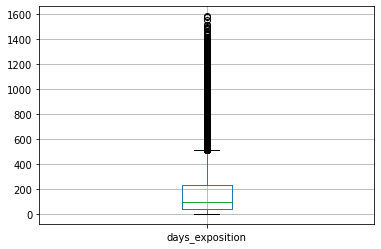

In [99]:
data.boxplot(column='days_exposition')

<AxesSubplot:>

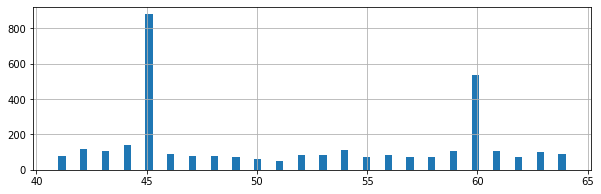

In [101]:
data.query('40<days_exposition<65')['days_exposition'].hist(bins=70, figsize=(10,3))

Исходи из данных можно судить, что половина всех снятых с продажи объявлений продались за от 45 до 231 дней. Среднее время продажи 181 день ( 6 месяцев), а медианное 95 дней (3 месяца). Быстрыми можно назвать те объявление, которые сняли меньше, чем через 45 дней (быстрее, чем 75%). Долгими можно назвать те объявление, которые сняли больше, чем через 231 день (дольше, чем 75%). Большие значения возможно были допущены из-за того, что объявления после продажи не закрывали после сделки.

Посмотрим факторы влияющие на зависимость цены от общей площади квартиры.

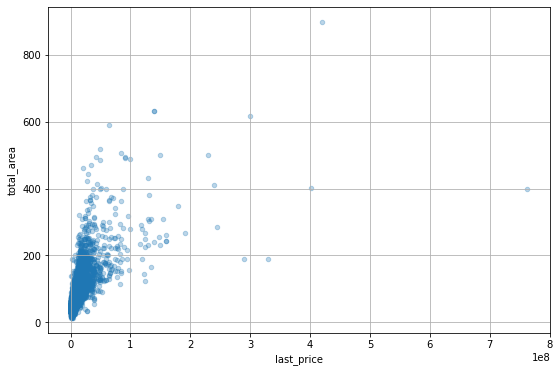

In [78]:
data.plot(kind='scatter', 
          x='last_price', 
          y='total_area',  
          figsize=(9, 6),
          grid=True, alpha=0.3);

In [79]:
data[['last_price', 'total_area']].corr()

,last_price,total_area
last_price,1.00000,0.65386
total_area,0.65386,1.00000


Зависимость цены от жилой площади.

In [80]:
data[['last_price', 'living_area']].corr()

,last_price,living_area
last_price,1.000000,0.576929
living_area,0.576929,1.000000


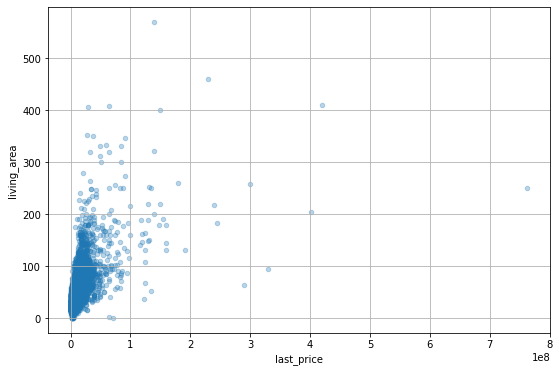

In [81]:
data.plot(kind='scatter', 
          x='last_price', 
          y='living_area',  
          figsize=(9, 6),
          grid=True, alpha=0.3);

Зависимость цены от площади кухни.

In [82]:
data[['last_price', 'kitchen_area']].corr()

,last_price,kitchen_area
last_price,1.000000,0.463312
kitchen_area,0.463312,1.000000


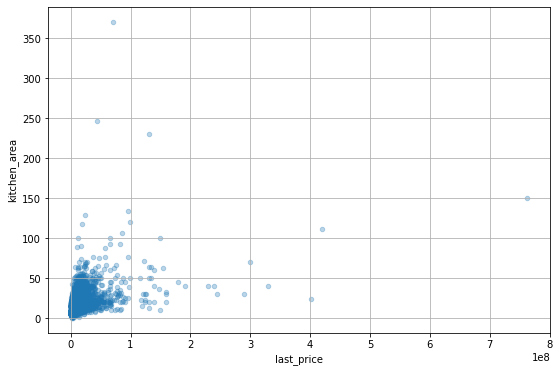

In [83]:
data.plot(kind='scatter', 
          x='last_price', 
          y='kitchen_area',  
          figsize=(9, 6),
          grid=True, alpha=0.3);

Зависимость цены от количества комнат.

In [84]:
price_rooms = data.pivot_table(index='rooms', 
                                       values='last_price', 
                                       aggfunc = ['mean', 'median', 'count'])
price_rooms.columns = ['mean_price', 'median_price', 'count']
price_rooms

,mean_price,median_price,count
rooms,,,
0,3.337724e+06,2700000.0,197
1,3.832211e+06,3600000.0,8038
2,5.593649e+06,4772669.0,7926
3,8.181581e+06,6200000.0,5800
4,1.342118e+07,9000000.0,1177
5,2.376208e+07,14000000.0,326
6,3.170975e+07,19000000.0,105
7,5.147007e+07,24900000.0,59
8,5.022417e+07,23095000.0,12


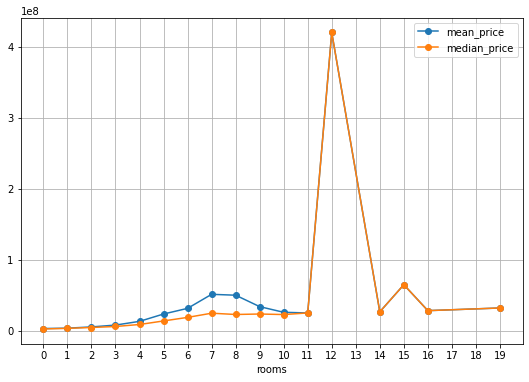

In [85]:
price_rooms.plot(kind='line',
                         y=['mean_price', 'median_price'],
                         figsize=(9, 6),
                         grid=True,
                         xticks=range(0, 20),
                         style='o-');

Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)

In [86]:
price_floor_type = data.pivot_table(index='floor_type', 
                                       values='last_price', 
                                       aggfunc = ['mean', 'median'])
price_floor_type.columns = ['mean_price', 'median_price']
price_floor_type

,mean_price,median_price
floor_type,,
другой,6.675648e+06,4850000.0
первый,4.801324e+06,3900000.0
последний,7.359366e+06,4300000.0


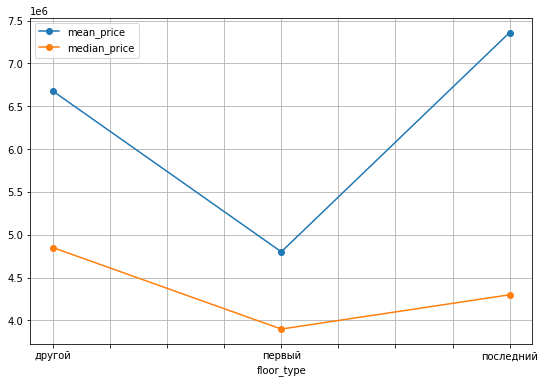

In [87]:
price_floor_type.plot(kind='line',
                              y=['mean_price', 'median_price'],
                              figsize=(9, 6),
                              grid=True, 
                              style='o-');

Зависимость цены от даты размещения (день недели, месяц, год)

In [88]:
price_weekday = data.pivot_table(index='weekday_exposition', 
                                       values='last_price', 
                                       aggfunc = ['mean', 'median'])
price_weekday.columns = ['mean_price', 'median_price']
price_weekday

,mean_price,median_price
weekday_exposition,,
0,6.512205e+06,4650000.0
1,6.396238e+06,4714595.0
2,6.626101e+06,4700000.0
3,6.710496e+06,4650000.0
4,6.365205e+06,4577500.0
5,6.983381e+06,4567500.0
6,6.246203e+06,4550000.0


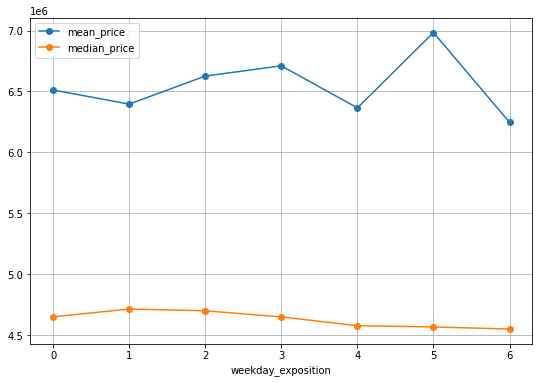

In [89]:
price_weekday.plot(kind='line',
                              y=['mean_price', 'median_price'],
                              figsize=(9, 6),
                              grid=True,
                              style='o-');

In [90]:
price_month = data.pivot_table(index='month', 
                                       values='last_price', 
                                       aggfunc = ['mean', 'median'])
price_month.columns = ['mean_price', 'median_price']
price_month

,mean_price,median_price
month,,
1,6.667711e+06,4600000.0
2,6.464463e+06,4650000.0
3,6.365902e+06,4660000.0
4,6.738903e+06,4800000.0
5,6.595561e+06,4500000.0
6,6.308784e+06,4400000.0
7,6.636387e+06,4650000.0
8,6.356032e+06,4570000.0
9,6.826241e+06,4700000.0


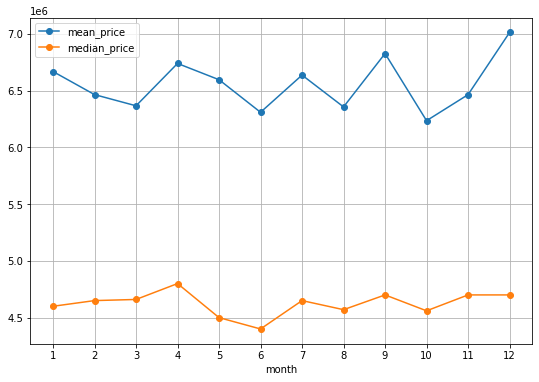

In [91]:
price_month.plot(kind='line',
                         y=['mean_price', 'median_price'],
                         figsize=(9, 6),
                         grid=True,
                         xticks=range(1, 13),
                         style='o-');

In [92]:
price_year = data.pivot_table(index='year', 
                                       values='last_price', 
                                       aggfunc = ['mean', 'median'])
price_year.columns = ['mean_price', 'median_price']
price_year

,mean_price,median_price
year,,
2014,1.208714e+07,7700000.0
2015,8.570131e+06,5312500.0
2016,6.823800e+06,4500000.0
2017,6.586601e+06,4500000.0
2018,5.951759e+06,4550000.0
2019,6.786618e+06,5050000.0


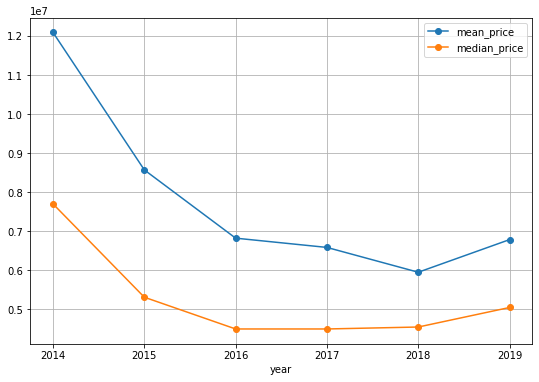

In [93]:
price_year.plot(kind='line',
                         y=['mean_price', 'median_price'],
                         figsize=(9, 6),
                         grid=True,
                         style='o-');

Больше всего на цену влияют общая площадь и количество комнат, жилая площадь и площадь кухни тоже коррелируют с ценой, но влияние слабее. Первые и последнии этажи в среднем стоят меньше, чем другие. День недели не оказывает влияние на цену. Медиана цены проседает в мае-июне. С 2014 до 2018 наблюдается спад цен на недвижимость, в 2019 случился рост цен. 

Посчитаем среднюю цену одного метра в 10 населенных пунктах и наибольшем числом объявлений.

In [112]:
mean_price = data.groupby('locality_name')['price_m2'].agg(['count', 'mean']) #создадим сводную таблицу
mean_price.columns = ['count', 'mean_square_meter']
mean_price.sort_values(by='count', ascending=False)['mean_square_meter'].astype(int)#отсортируем таблицу
mean_price.sort_values(by='count', ascending=False).head(10)

,count,mean_square_meter
locality_name,,
санкт-петербург,15733,114807.404862
мурино,590,86087.512050
кудрово,472,95324.930544
шушары,440,78677.364217
всеволожск,398,68654.473986
пушкин,369,103125.819291
колпино,338,75424.579098
парголово,327,90175.913458
гатчина,307,68746.146763


Самое дорогое жилье в Санкт-Петербурге и в Пушкино, а самое дешевое в Выборге. Это скорее всего связано с расстоянием от центра, чем дальше от Санкт-Петербурга, тем дешевле можно купить квартиру.

Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра.

In [95]:
km_price_spb = data[data['locality_name'] == 'санкт-петербург'].groupby('cityCenters_nearest_km')['last_price'].agg(['mean', 'count'])
km_price_spb.columns = ['mean_price', 'count']
km_price_spb

,mean_price,count
cityCenters_nearest_km,,
0.0,3.144912e+07,27
1.0,2.115871e+07,193
2.0,1.778832e+07,310
3.0,1.112658e+07,350
4.0,1.329268e+07,691
5.0,1.448978e+07,921
6.0,1.533842e+07,618
7.0,1.477515e+07,420
8.0,9.949257e+06,596


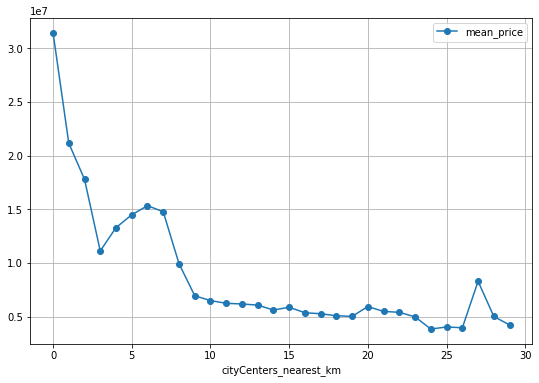

In [96]:
km_price_spb.plot(kind='line', 
                  y='mean_price',
                  figsize=(9, 6),
                  grid=True,
                  style='o-');

Предсказуемо, чем недвижимость ближе к центру, тем она дороже. От 0го до 3го км от центра цены стремительно снижаются. 4, 5, 6, 7 км показывают примерно один уровень средней цены. 8 км на уровне 3 км. После 9го есть тренд на снижение средней цены, но он небольшой. 27й км выбивается из графика, возможно, это какое-то место с большим количеством достопримечательностей.

### Общий вывод

 Из проведенного иследования можно сделать вывод, что чем больше площадь квартиры, больше комнат, колличество жилой площади, тем выше цена, соответвенно и выше цена за квадратный метр. На первом этаже квартира дешевле, чем на остальных; на последнем дороже, чем на первом. Квартира в самом центре будет стоить дороже всего. В выходной день подается в два раза меньше объявлений чем в будний. Люди меньше подают объявления в декабре, январеь, мае, а так же в летний период. В среднем квартира продается до 3 месяца. С 2014 до 2018 цены на квартиры падали, в 2019 случился рост цен на недвижимость.